In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


# Categorical plots
Визуализация категориальных данных:  
- частота (frequency)
- количество (нормированное и нет)
- сумма
- среднее
- и тд

## Barplot

In [3]:
df = sns.load_dataset("tips")  # воспользуемся датасетом с чаевыми
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='sex', ylabel='total_bill'>

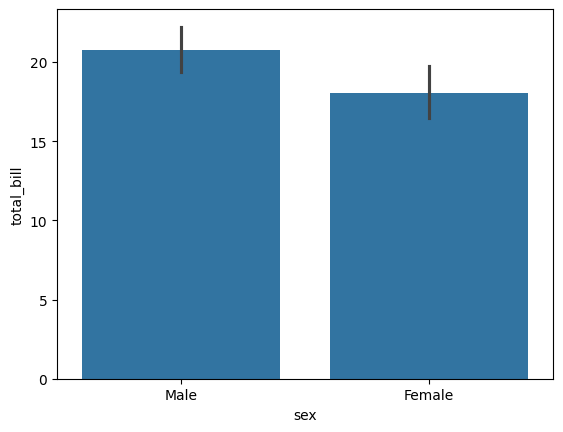

In [4]:
sns.barplot(data=df, x="sex", y="total_bill")  # обычный барплот

<Axes: xlabel='sex', ylabel='total_bill'>

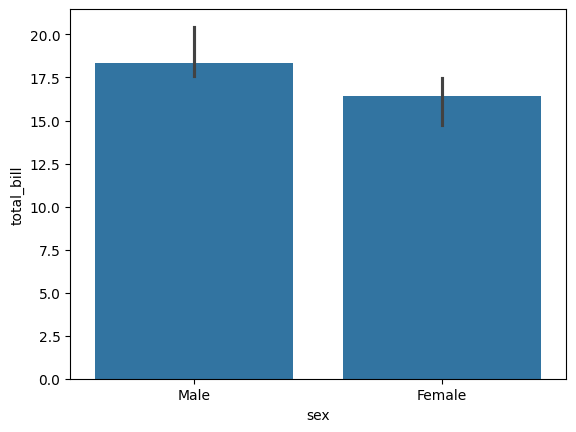

In [5]:
sns.barplot(
    data=df, x="sex", y="total_bill", estimator=np.median
)  # по-умолчанию barplot считает среднее. можно поставить другую функцию для применения к столбцу (агрегации)

<Axes: xlabel='sex', ylabel='total_bill'>

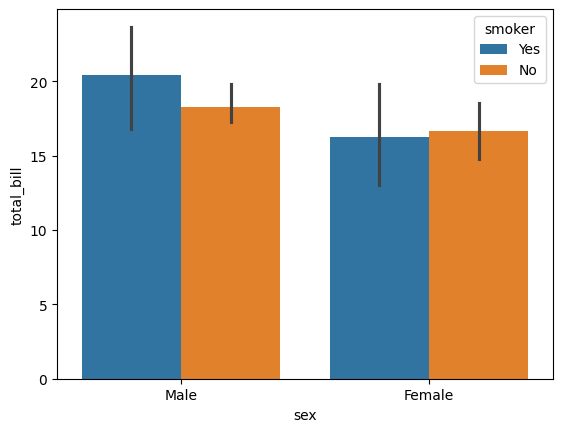

In [6]:
sns.barplot(
    data=df, x="sex", y="total_bill", estimator=np.median, hue="smoker"
)  # разбивка по бинарной категории

# можно ли сказать, что курящие оставляют больше чаевых? (смотря на график)
# как справедливо проверить эту информацию?

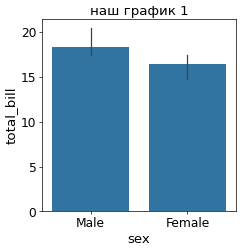

In [7]:
# seaborn -- обертка вокруг matplotlib

plt.figure(figsize=(5, 5), dpi=50)  # matplotlib

sns.set_context("paper", font_scale=2)  # seaborn
sns.barplot(data=df, x="sex", y="total_bill", estimator=np.median)  # seaborn

plt.title("наш график 1")
plt.show()

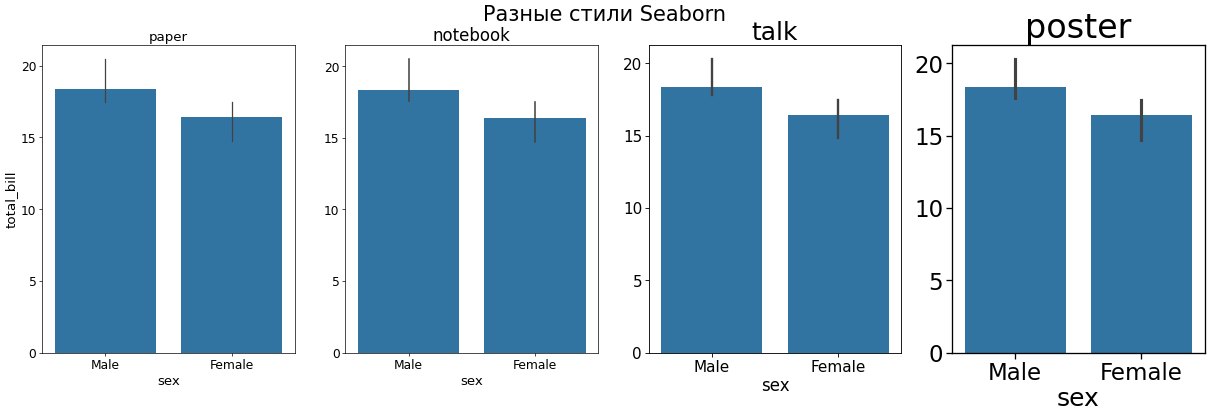

In [8]:
# seaborn -- обертка вокруг matplotlib

plt.figure(figsize=(30, 8), dpi=50)  # matplotlib

plt.subplot(1, 4, 1)
plt.title("paper")

sns.set_context("paper", font_scale=2)  # seaborn
sns.barplot(data=df, x="sex", y="total_bill", estimator=np.median)  # seaborn

plt.subplot(1, 4, 2)
sns.set_context("notebook", font_scale=2)
plt.title("notebook")
sns.barplot(data=df, x="sex", y="total_bill", estimator=np.median)
plt.ylabel("")  # уберем подпись оси

plt.subplot(1, 4, 3)
sns.set_context("talk", font_scale=2)
plt.title("talk")
sns.barplot(data=df, x="sex", y="total_bill", estimator=np.median)
plt.ylabel("")

plt.subplot(1, 4, 4)
sns.set_context("poster", font_scale=2)
plt.title("poster")
sns.barplot(data=df, x="sex", y="total_bill", estimator=np.median)
plt.ylabel("")

plt.suptitle("Разные стили Seaborn", fontsize=30)  # общее название


plt.show()

In [9]:
sns.set_context("notebook", font_scale=1)  # оставим пресет notebook

## Countplot

<Axes: xlabel='day', ylabel='count'>

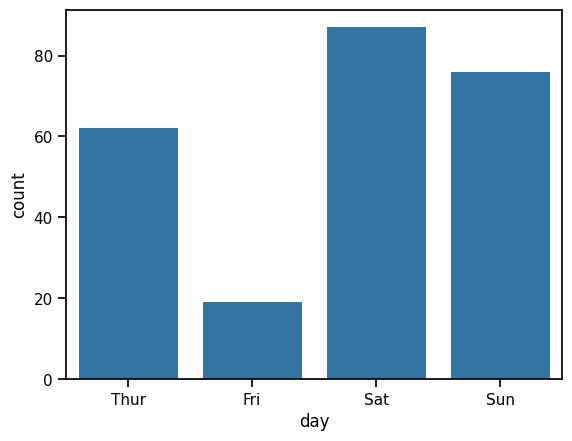

In [10]:
sns.countplot(data=df, x="day")  # это просто barplot с count в качестве estimator

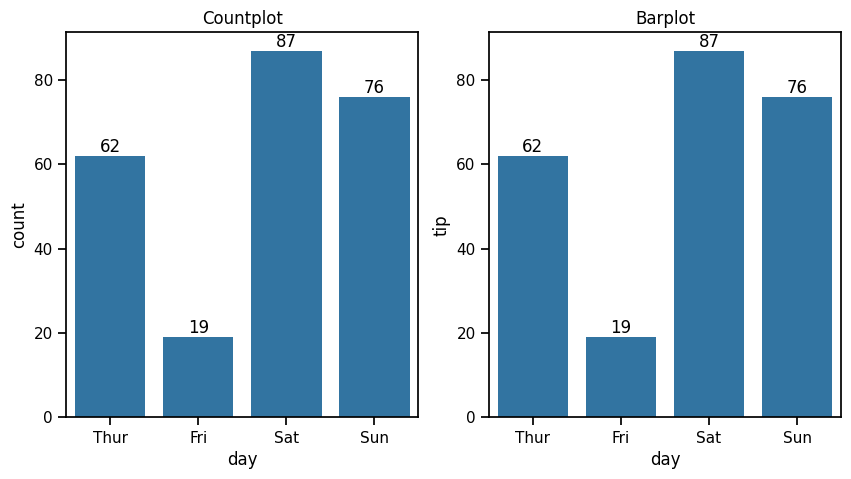

In [11]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Countplot")
ax = sns.countplot(data=df, x="day")
for i in ax.containers:  # чтобы нарисовать подписи
    ax.bar_label(
        i,
    )

plt.subplot(1, 2, 2)
plt.title("Barplot")
ax = sns.barplot(data=df, x="day", y="tip", estimator=len)  # то же, что и выше)

for i in ax.containers:
    ax.bar_label(
        i,
    )

## Boxplot

In [12]:
df.head(1)  # вспомним, как выглядит датафрейм

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2


<Axes: xlabel='day', ylabel='tip'>

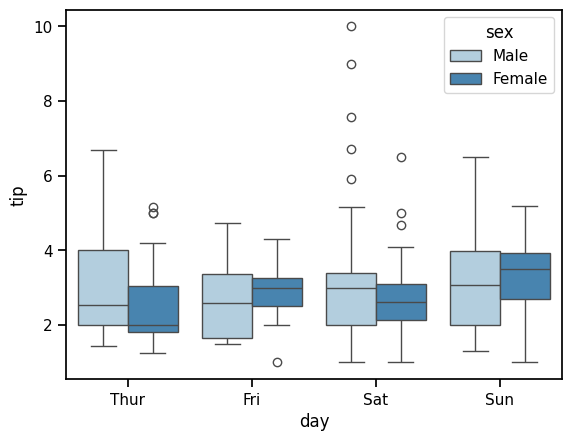

In [13]:
sns.boxplot(data=df, x="day", y="tip", hue="sex", palette="Blues")

C:\Users\igumn\AppData\Local\Temp\ipykernel_15428\2219802094.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(data=df, x='smoker', y='tip', palette='Blues') # если данных много # каждый раз отсекается половина от оставшихся данных


<Axes: xlabel='smoker', ylabel='tip'>

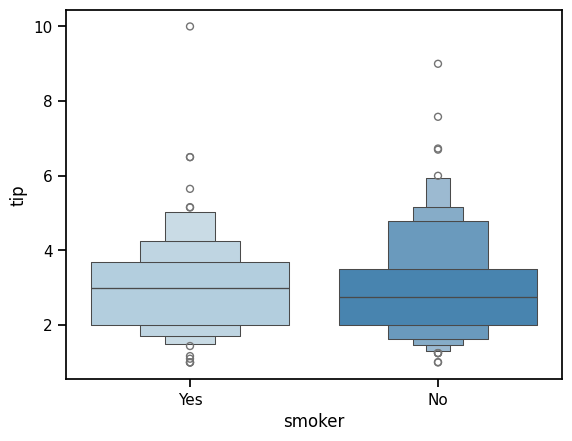

In [14]:
sns.boxenplot(
    data=df, x="smoker", y="tip", palette="Blues"
)  # если данных много # каждый раз отсекается половина от оставшихся данных

# 25%
# 12.5%
# 6.25%
# и тд

## Violin plot

<Axes: xlabel='day', ylabel='tip'>

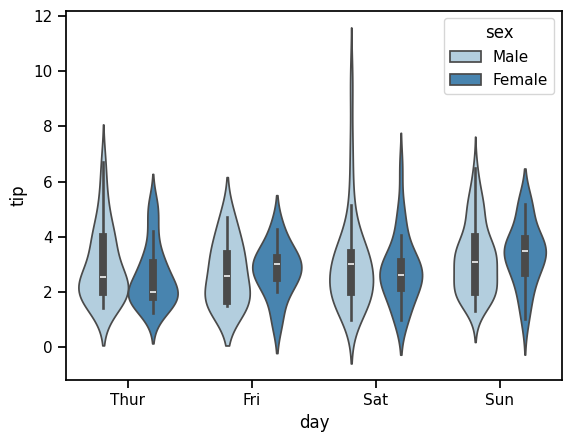

In [15]:
sns.violinplot(data=df, x="day", y="tip", hue="sex", palette="Blues")

<Axes: xlabel='day', ylabel='tip'>

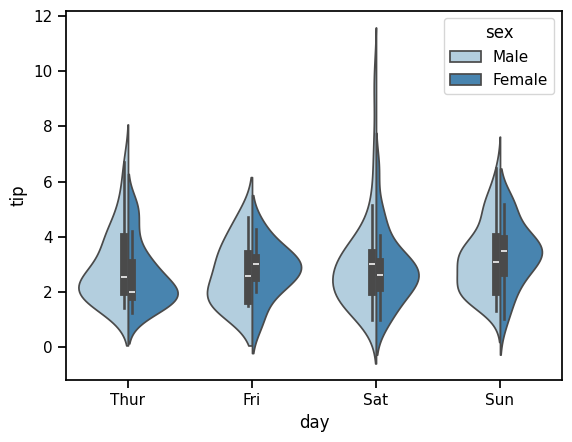

In [16]:
sns.violinplot(data=df, x="day", y="tip", hue="sex", palette="Blues", split=True)

## Strip plot

<Axes: xlabel='day', ylabel='tip'>

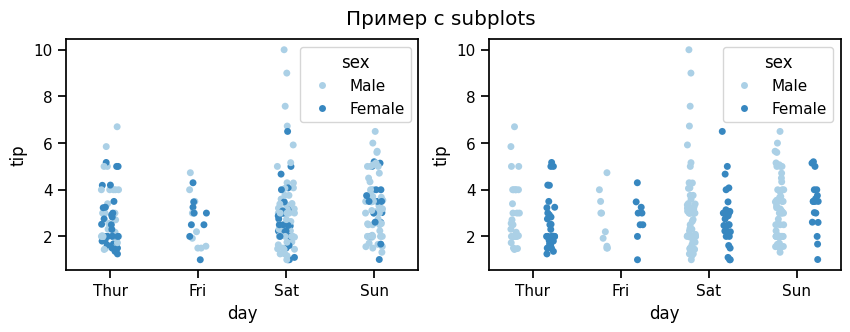

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))

plt.suptitle("Пример с subplots")

sns.stripplot(
    data=df, x="day", y="tip", hue="sex", dodge=False, palette="Blues", ax=ax[0]
)  # ax=ax[i]
sns.stripplot(
    data=df, x="day", y="tip", hue="sex", dodge=True, palette="Blues", ax=ax[1]
)  # ax=ax[i]

# Распределения

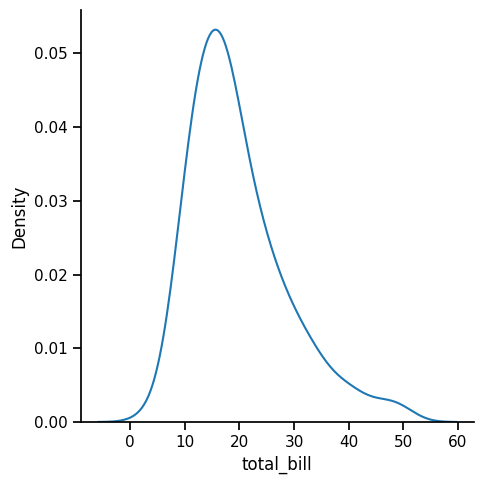

In [22]:
sns.displot(df["total_bill"], kind="kde")

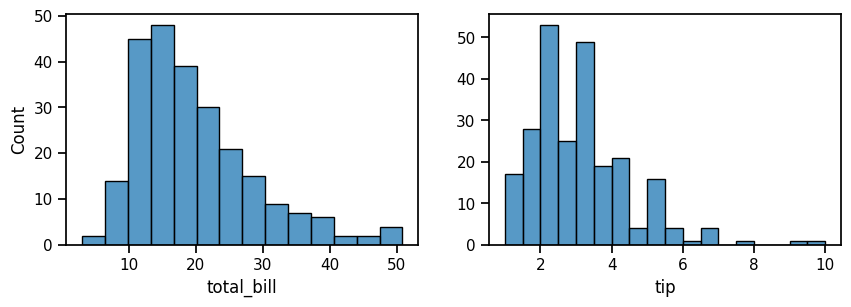

In [26]:
plt.figure(figsize=(10, 3))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x="total_bill")
plt.subplot(1, 2, 2)
sns.histplot(data=df, x="tip")

plt.ylabel("")
plt.show()

<Axes: xlabel='total_bill', ylabel='tip'>

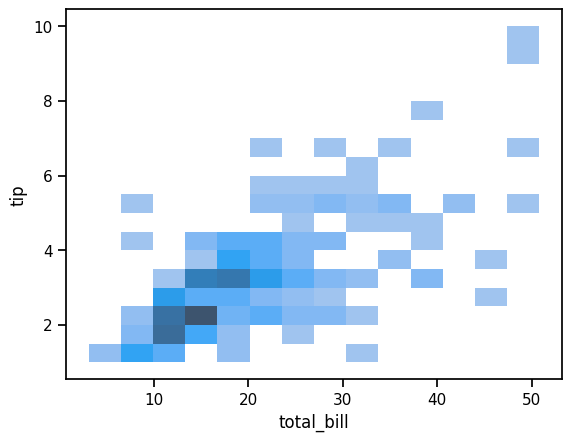

In [28]:
sns.histplot(data=df, x="total_bill", y="tip")  # 2D распределение

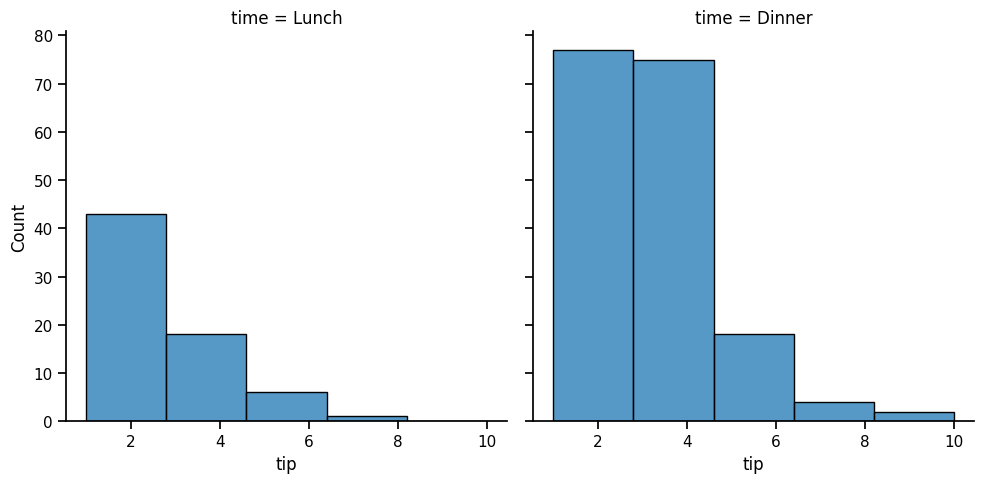

In [31]:
sns.displot(data=df, x="tip", bins=5, col="time")

In [37]:
# sns.displot(data=df, x='total_bill', bins=15, kind='hist')
# sns.displot(data=df, x='total_bill', kind='kde')
# sns.displot(data=df, x='total_bill', kind='ecdf')

# для каждого типа графика распределения есть отдельная функция

## Joint plot

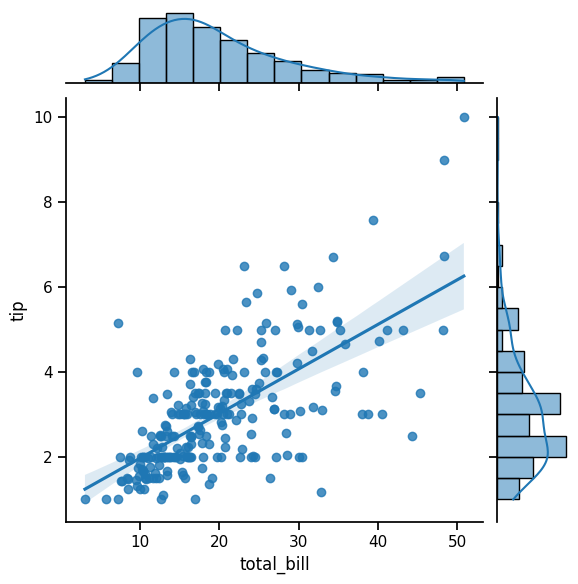

In [38]:
sns.jointplot(data=df, x="total_bill", y="tip", kind="reg")  # два 1d и 2d распределение

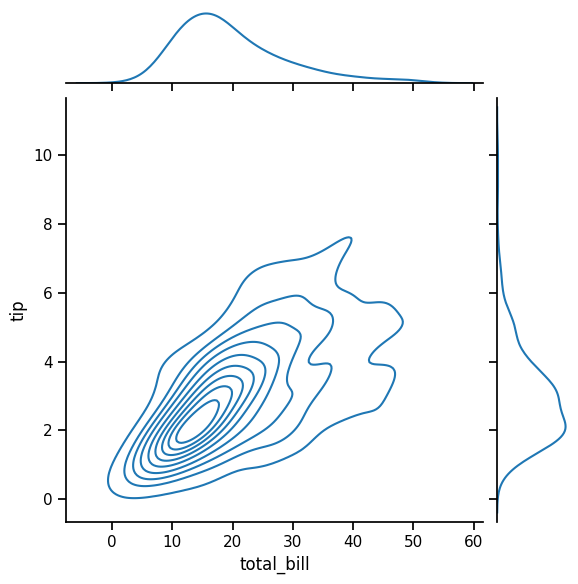

In [39]:
sns.jointplot(data=df, x="total_bill", y="tip", kind="kde")  # если точек слишком много

<Axes: xlabel='total_bill', ylabel='tip'>

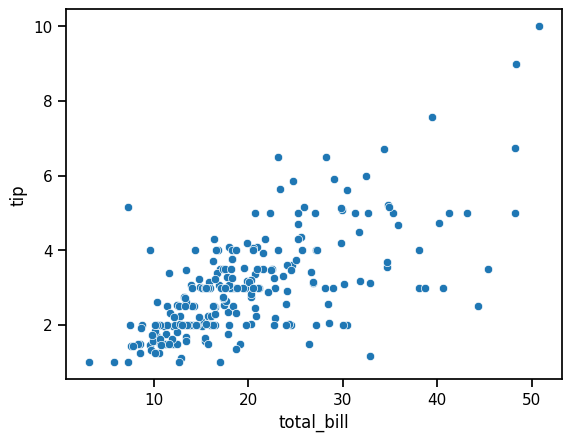

In [41]:
sns.scatterplot(data=df, x="total_bill", y="tip")

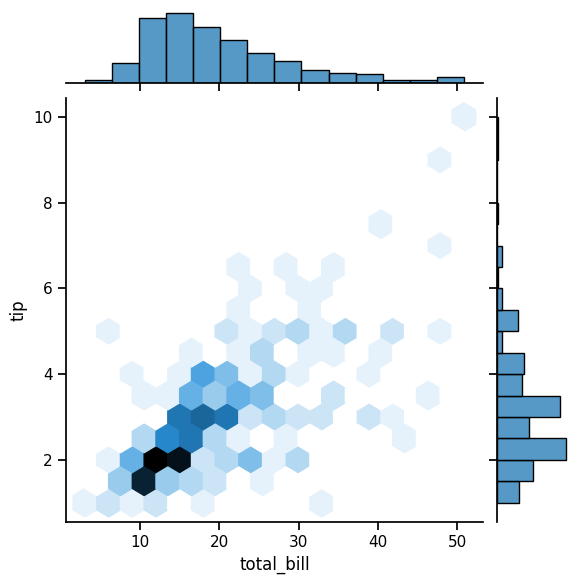

In [42]:
sns.jointplot(data=df, x="total_bill", y="tip", kind="hex")

## KDE plot

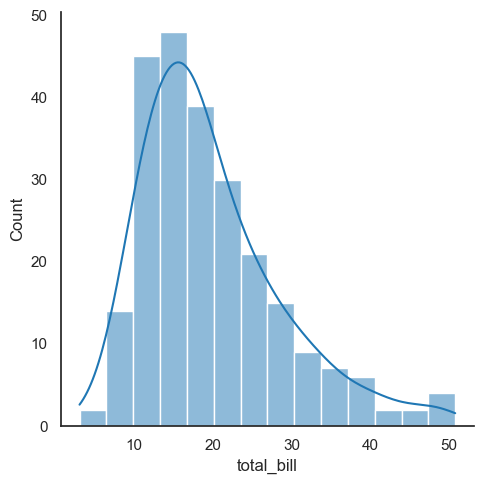

In [33]:
# displot
# обратно в чаевым
sns.set_style("white")
sns.displot(data=df, x="total_bill", kde=True)

<AxesSubplot: xlabel='total_bill', ylabel='Density'>

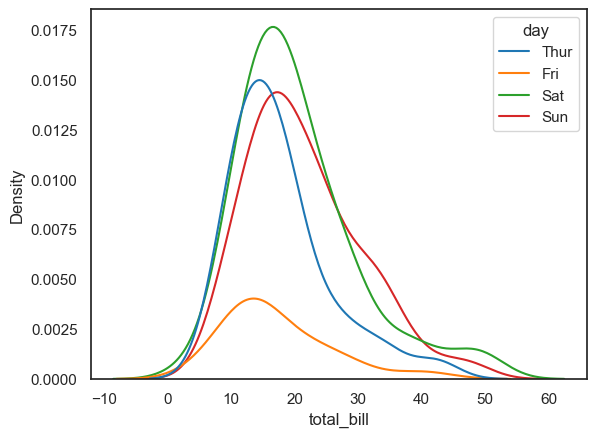

In [34]:
sns.kdeplot(data=df, x="total_bill", hue="day")

# Heatmap 

In [43]:
flights = sns.load_dataset("flights")
flights.head(3)

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132


<Axes: xlabel='year', ylabel='passengers'>

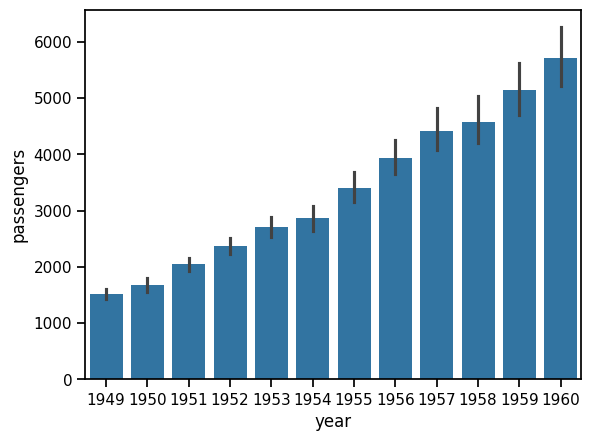

In [53]:
sns.barplot(data=flights, x="year", y="passengers", estimator="sum")

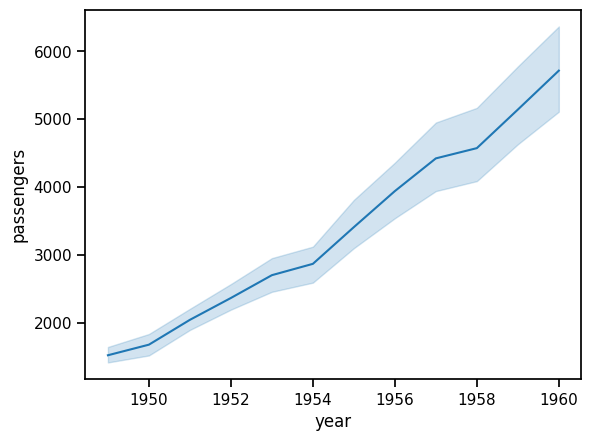

In [58]:
sns.lineplot(
    data=flights, x="year", y="passengers", estimator="sum", errorbar=("ci", 99)
);

In [59]:
flights2 = flights.pivot(values="passengers", index="year", columns="month")

In [60]:
flights2

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


<Axes: xlabel='month', ylabel='year'>

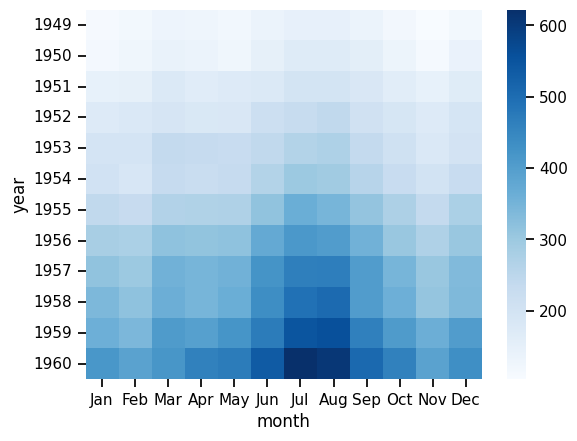

In [61]:
sns.heatmap(flights2, cmap="Blues")

<Axes: xlabel='month', ylabel='year'>

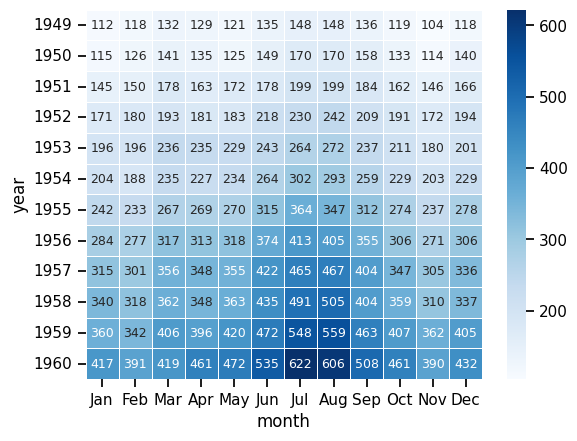

In [75]:
sns.heatmap(
    flights2,
    cmap="Blues",
    linecolor="white",
    linewidth=0.5,
    annot=True,
    fmt="d",
    annot_kws={"size": 9},
)

<Axes: xlabel='month', ylabel='year'>

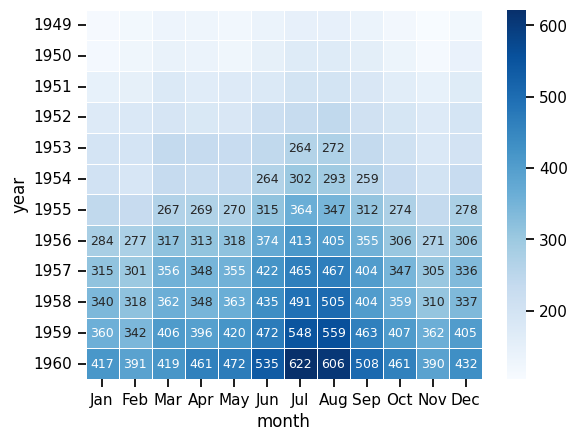

In [79]:
def anno_format(cell, threshold=250):
    if cell > threshold:
        return str(cell)
    return ""


flights2_anno = flights2.map(anno_format)

sns.heatmap(
    flights2,
    cmap="Blues",
    linecolor="white",
    linewidth=0.5,
    annot=flights2_anno,
    fmt="",
    annot_kws={"size": 9},
)

# Cluster map

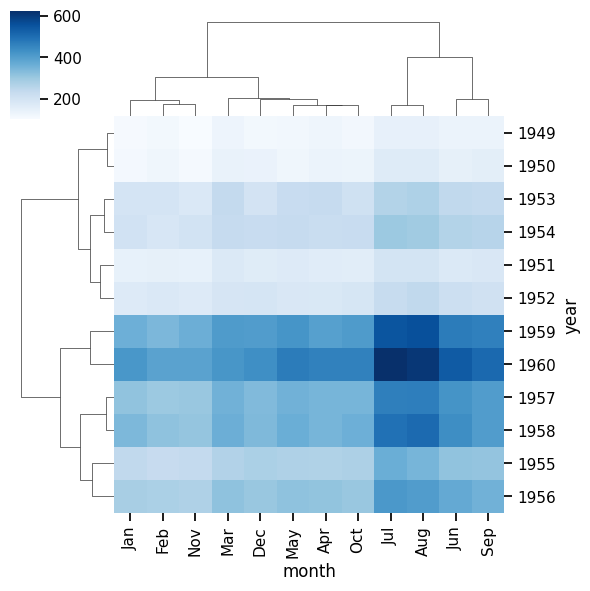

In [63]:
sns.clustermap(flights2, cmap="Blues", figsize=(6, 6))
plt.show()

# Практика

In [44]:
data = sns.load_dataset("penguins")  # датасет про пингвинов

In [45]:
data.head()  # flipper -- плавник, bill -- клюв

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


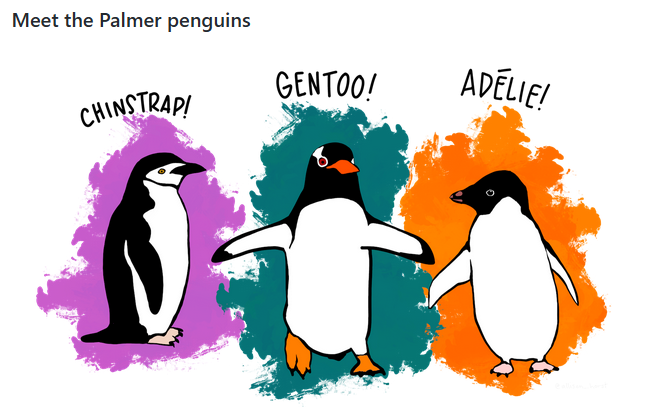

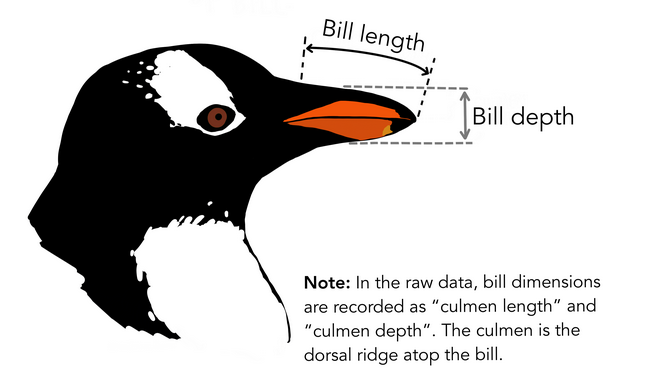

In [46]:
data.head(2)  # flipper -- плавник, bill -- клюв

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female


In [47]:
# постройке scatterplot для зависимости body mass от flipper length

In [48]:
# сделайте так, чтобы в вашем scatterplot три вида были окрашены в разный цвет

In [49]:
# а теперь сделайте, чтоб они еще были разной формы (то есть разная форма точек)

In [50]:
# постройте частотную гистограмму для flipper length

In [51]:
# посмотрите, есть ли дисбаланс классов? сколько пингвинов каждого вида?
# кажется, число немного разное. если они сильно разное, то данные стоит нормировать
# постройте гистограмму, которая будет показывать не сырые counts, а, например, проценты
# (посмотрите, какие есть варианты у функции визуализации)

In [52]:
# зайдите в галерею сибор или матплотлиб и выберите для себя палитру, которая вам нравится
# постройте 2D распределение для bill_length_mm и bill_depth_mm (joint plot)

In [53]:
# постройте 2D histplot для этих же двух столбцов

In [54]:
# постройте боксплот body_mass_g и разбейте его по трём видам

In [55]:
# каждый вид разбейте также на Male и Female особей

In [56]:
# посчитайте для каждого вида (отдельно для мальчиков и девочек) среднее значение для каждого столбца